# Cognitive Algorithms - Assignment 4 (30 points)
Cognitive Algorithms        
Winterterm 2017/2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on 14.12.2017 **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

# Part 2: Programming (27 points)
---
Note that part 2 of this assignment consists of two tasks.

### Task 1: Ordinary Least Squares (9 points)
In this assignment you will implement a linear regression and predict two dimensional hand positions from electromyographic (EMG) recordings obtained with high-density electrode arrays on the lower arm.  Download the data set ```myo_data.mat``` from the ISIS web site, if not done yet. 

In [1]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from scipy.io import loadmat
%matplotlib inline

In [11]:
def load_myo_data(fname):
    ''' Loads EMG data from <fname>                      
    '''
    # load the data
    data = loadmat(fname)
    # extract data and hand positions
    X = data['training_data']
    #X = sp.log(X)
    Y = data['training_labels']
    #Split data into training and test data
    X_train = X[:, :5000]
    X_test = X[:, 5000:]
    Y_train = Y[:, :5000]
    Y_test = Y[:, 5000:]
    return X_train,Y_train,X_test, Y_test

def train_ols(X_train, Y_train, llambda = 0):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 llabmda  -  Regularization parameter
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with sp.dot(W.T, X)                      
    '''
    #your code here
    return sp.dot(sp.dot(sp.linalg.inv(sp.dot(X_train,X_train.T)+llambda*sp.identity(X_train.shape[0])),X_train),Y_train.T)
    
    
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    #your code here
    return sp.dot(W.T, X_test)
    
def predict_handposition():
    X_train,Y_train,X_test, Y_test = load_myo_data('myo_data.mat')
    # compute weight vector with linear regression
    W = train_ols(X_train, Y_train)
    # predict hand positions
    Y_hat_train = apply_ols(W, X_train)
    Y_hat_test = apply_ols(W, X_test) 
        
    pl.figure(figsize=(8,6))
    pl.subplot(2,2,1)
    pl.plot(Y_train[0,:1000],Y_train[1,:1000],'.k',label = 'true')
    pl.plot(Y_hat_train[0,:1000],Y_hat_train[1,:1000],'.r', label = 'predicted')
    pl.title('Training Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,2)
    pl.plot(Y_test[0,:1000],Y_test[1,:1000],'.k')
    pl.plot(Y_hat_test[0,:1000],Y_hat_test[1,:1000],'.r')
    pl.title('Test Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    
    pl.subplot(2,2,3)
    pl.plot(Y_train[1,:600], 'k', label = 'true')
    pl.plot(Y_hat_train[1,:600], 'r--', label = 'predicted')
    pl.xlabel('Time')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,4)
    pl.plot(Y_test[1,:600],'k')
    pl.plot(Y_hat_test[1,:600], 'r--')
    pl.xlabel('Time')
    pl.ylabel('y position')
    
def test_assignment4():
    ##Example without noise
    x_train = sp.array([[ 0,  0,  1 , 1],[ 0,  1,  0, 1]])
    y_train = sp.array([[0, 1, 1, 2]])
    w_est = train_ols(x_train, y_train) 
    w_est_ridge = train_ols(x_train, y_train, llambda = 1)
    assert(sp.all(w_est.T == [[1, 1]])) 
    assert(sp.all(w_est_ridge.T == [[.75, .75]]))
    y_est = apply_ols(w_est,x_train)
    assert(sp.all(y_train == y_est)) 
    print ('No-noise-case tests passed')
    
    ##Example with noise
    #Data generation
    w_true = 4
    X_train = sp.arange(10)
    X_train = X_train[None,:]
    Y_train = w_true * X_train + sp.random.normal(0,2,X_train.shape)
    #Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est = apply_ols(w_est,X_train)
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+', label = 'Train Data')
    pl.plot(X_train.T, Y_est.T, label = 'Estimated regression')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.legend(loc = 'lower right')

** A) (5 points)** Implement ordinary least squares regression (OLS) with an optional ridge parameter by completing the function stubs  ```ols_train``` and  ```ols_apply```. In ```ols_train```, you estimate a linear mapping $W$,    
$$W = (X_{\text{train}}X_{\text{train}}^{\top} + \lambda I)^{-1}X_{\text{train}}Y_{\text{train}}^{\top}$$       
that optimally predicts the training labels from the training data, $X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}$,  $Y_{\text{train}} \in\mathbb{R}^{D_Y \times N_{tr}}$. Here, $\lambda \in \mathbb R$ is the (optional) Ridge regularization parameter.  
The function ```ols_apply``` than uses the weight vector to predict the (unknown) hand positions of new test data $X_{\text{test}} \in\mathbb{R}^{D_X \times N_{te}}$     
$$Y_{\text{test}} = W^{\top}X_{\text{test}}$$         
The function  ```test_assignment4``` helps you to debug your code.

No-noise-case tests passed


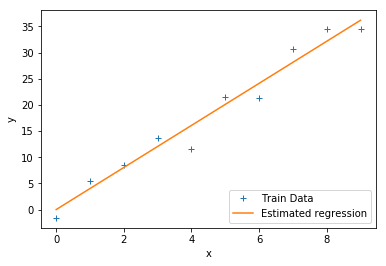

In [8]:
test_assignment4()

**B) (1 point)**  The data set ```myo_data.mat``` consists of preprocessed EMG data $X$ and 2-dimensional stimulus labels $Y$. Labels are x/y positions of the hand during different hand movements. The function  ```load_myo_data```  loads the data and splits it into train and test data. Familiarize yourself with the data by answering the following questions:         
How many time points $N_{tr}$ does the train set contain? How many time points $N_{te}$ does the test set contain? At each time point, at how many electrodes $D_X$ was the EMG collected? 

$N_{tr} =$ **5000**                   
$N_{te} =$ **5255**                        
$D_{X} =$ **192**                   

In [9]:
X_train,Y_train,X_test, Y_test = load_myo_data('myo_data.mat')
print(X_train.shape,X_test.shape)

(192, 5000) (192, 5255)


**C) (1 points)** Predict two dimensional hand positions by calling the function ```predict_handpositions```. It plots, for the train and the test data, the true hand position versus the estimated hand position. Do you notice a performance difference between train and test data set? Is this a surprising result?

**[Your answer for C) here]**
it looks like the performance for the train Data is better. this is not a surprise as the model is trained with the train data. we see overfitting here.

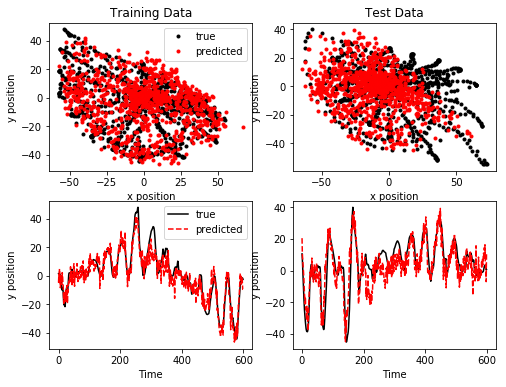

In [10]:
predict_handposition()

**D) (1 points)** In the previous tasks, we have used the logarithmized muscle activiations to predict the hand positions. Comment the line where we logarithmize the EMG features in the function  ```load_myo_data``` and call  ```predict_handpositions``` again. Do you notice a performance difference compared to the logarithmized version? Why?

**[Your answer for D) here]**
the performance for train and test data is worse compared to the logarithmized version. the hand position is a non-linar function. By logarithmizing the data we get a more linearly form where for strong muscle activation the handposition is less overestimated. 

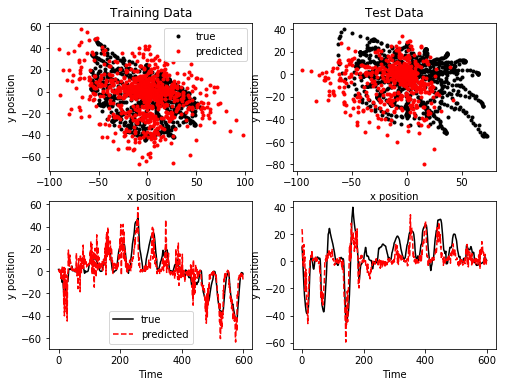

In [12]:
predict_handposition()

**E) (1 points)** If we cannot predict the labels $Y$ perfectly by a linear regression on $X$, does this imply that the relationship between $X$ and $Y$ is non-linear? Explain your decision.

**[Your answer for E) here]** 
no because there can be other reasons why the prediction is not perfect, e.g. the model is not trained well enough.

### Task 2: Polynomial Regression (18 points)
In task 1 you implemented linear regression. However, you will see in this task, that aboves code can be generalized to polynomial regression.

**A) (9 points)**  Write a function  ```test_polynomial_regression``` which generates toy data and visualizes the results from a polynomial regression. The goal is to create two plots as in the Figure below (Note that your figure will look slightly different, because the data is generated randomly.)     
To do so, first create toy data from a sine function as follows:           
$$x_i \in \{0, 1, 2, \ldots, 10\}, y_i = \sin(x_i) + \epsilon_i, \; \; \epsilon_i \sim \mathcal{N}(0, 0.5)$$        
where $\mathcal{N}$(mean, standard deviation) denotes the Gaussian distribution and $i \in \{1, 2, \ldots, 11\}$ is an index. Then implement polynomial regression, which models the relationship between $y$ and $x$ as an $m$th order polynomial, i.e. 
$\hat{y} = w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m$. The parameters $w_0, w_1, \ldots , w_m \in \mathbb R$ are estimated by Ridge Regression. 

*Hint:* You can use your functions ```ols_train``` and  ```ols_apply```, if you build an appropriate data matrix (for loops are allowed to do so).

Apply and visualize polynomial ridge regression for different parameters.

![Figure_1](Figure_1.png)

In [13]:
#your code here
def test_polynomial_regression():
    #toy data set 
    x = sp.expand_dims(sp.arange(0,11, dtype='float64'),axis=0) 
    for i in sp.arange(0,11):
        c = x[i,:]*x[0,:]
        x = sp.concatenate([x,sp.expand_dims(c,axis=0)])
    #compute true toy data output    
    y = sp.sin(x[0,:])+ sp.random.normal(0,0.5,x.shape[1])

    #add offset parameters
    x = sp.concatenate([sp.expand_dims(sp.ones(x.shape[1]),axis=0),x])

    #weight vector for different degrees m
    w_m1 = train_ols(x[0:2,:] , y)
    w_m4 = train_ols(x[0:5,:] , y)
    w_m10 = train_ols(x[0:11,:] , y)

    #weigt vectors for different llambdas
    w_l0 = train_ols(x[0:10,:] , y, llambda = 0)
    w_l1 = train_ols(x[0:10,:] , y, llambda = 1)
    w_l10k = train_ols(x[0:10,:] , y, llambda = 10000)

    # Data set for Plotting 
    px = sp.expand_dims(sp.arange(0,11,0.1, dtype='float64'),axis=0)
    for i in sp.arange(0,11):
        c = px[i,:]*px[0,:]
        px = sp.concatenate([px,sp.expand_dims(c,axis=0)])
    px = sp.concatenate([sp.expand_dims(sp.ones(px.shape[1]),axis=0),px])

    # Model Output for different degrees m
    y_m1 = sp.dot(w_m1.T,px[0:2,:])
    y_m4 = sp.dot(w_m4.T,px[0:5,:])
    y_m10 = sp.dot(w_m10.T,px[0:11,:])

    # Model Output for different llambdas 
    y_l0 = sp.dot(w_l0.T,px[0:10,:])
    y_l1 = sp.dot(w_l1.T,px[0:10,:])
    y_l10k = sp.dot(w_l10k.T,px[0:10,:])

    #Plot result

    pl.figure(figsize=(15,6))
    pl.subplot(1,2,1)
    pl.plot(x[1,:], y, '+', label = 'Train Data')
    pl.plot(px[1,:], y_m1[:],'g-.', label = 'm = 1')
    pl.plot(px[1,:], y_m4[:],'b', label = 'm = 4')
    pl.plot(px[1,:], y_m10[:],'r--', label = 'm = 10')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.xlim(-0.5,11)
    pl.ylim(-3,3)
    pl.legend(loc = 'best')
    pl.title('Polynomial regression for different degrees m')

    pl.subplot(1,2,2)
    pl.plot(x[1,:], y, '+', label = 'Train Data')
    pl.plot(px[1,:], y_l0[:],'r--', label = '$\lambda = 0$')
    pl.plot(px[1,:], y_l1[:],'b', label = '$\lambda = 1$')
    pl.plot(px[1,:], y_l10k[:],'g-.', label = '$\lambda = 10k$')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.xlim(-0.5,11)
    pl.ylim(-3,3)
    pl.legend(loc = 'best')
    pl.title('Polynomial ridge regression (m = 9)')

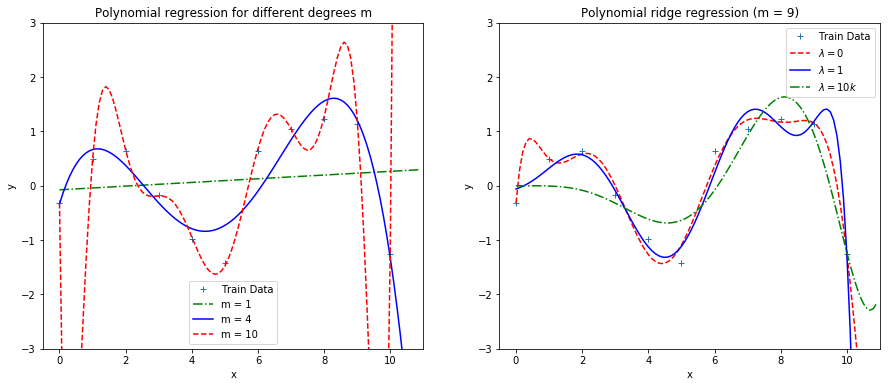

In [14]:
test_polynomial_regression()  

**B) (9 points)** Run your code of task A) multiple times.
- (4 points) What do you observe for the different values of the parameters $m$ and $\lambda$? Explain this behaviour. 
- (2 points) Decide for each of the two figures which values of the parameters yield the best fit. 
- (3 points) Do you expect those parameters to perform good on all possible data sets? Explain your decision.

**[Your answers for B) here]**
- For different degrees m we see very different plot. the higher the degree, the more changes the plot with multiple runs. the reason is that the higher the degree is, the higher is the variance of the estimation. Then the random changes in our toy data set cause a considerbly change of the estimation. We observe strong overfitting for high m. The green line for example has low variance but very high bias, because of the estimation error. With the regulatrization parameter $\lambda$ we can lower the variance. That can be observed in the right figure. the green line don't changes that strongly like the blue and like the red, which has no regularization. A large value of $\lambda$ gives low variance. For low $\lambda$ there is a large variance but low bias.
- For both figures the blue plot seems to yield the best results. the aim is to find a model with low variance and a low bias. in both models the blue plot is a good trade-off.
- No, the parameters will run good on data sets, where $y \in \mathbb R$ and the data has Gaussian Noise. For binary data, where we have a classification problem, regression does not really work. 